In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
fake = pd.read_csv('Fake.csv')
real = pd.read_csv('True.csv')

In [ ]:
fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [ ]:
real.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [ ]:
print(fake.shape)
print(real.shape)


(23481, 4)
(21417, 4)


In [ ]:
real.loc[3,'text']

'WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the New York Times reported on Saturday. The conversation between Papadopoulos and the diplomat, Alexander Downer, in London was a driving factor behind the FBI’s decision to open a counter-intelligence investigation of Moscow’s contacts with the Trump campaign, the Times reported. Two months after the meeting, Australian officials passed the information that came from Papadopoulos to their American counterparts when leaked Democratic emails began appearing online, according to the newspaper, which cited four current and former U.S. and foreign officials. Besides the information from the Australians, the probe by the Federal Bureau of Investigation was also propelled by intelligence from other friendly governments, including the British and Dutch, the Times said. Papadopoulos, a Chicago-based inte

In [ ]:
real['Label'] = 0
fake['Label'] = 1

In [ ]:
df = pd.concat([fake, real], axis=0)
df

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [ ]:
df.isnull().sum()


title      0
text       0
subject    0
date       0
Label      0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


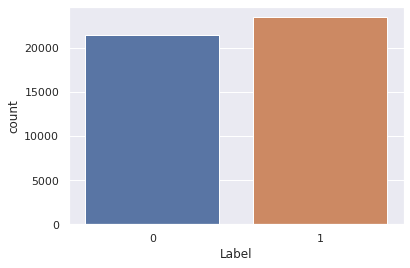

In [ ]:
import seaborn as sns
sns.countplot(df['Label'])

Text(0.5, 1.0, 'Fake/Real News Proportion')

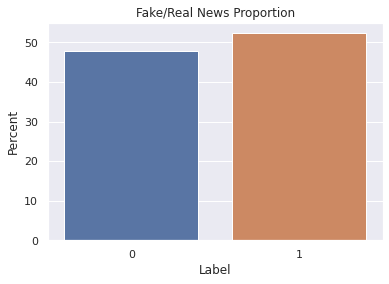

In [ ]:
ax = sns.barplot(x="Label", y="Label", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")


plt.title('Fake/Real News Proportion')

In [ ]:
import re

def clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

df['text']=df['text'].apply(clean)

In [ ]:
df.iloc[0,1]

'donald trump just couldn t wish all americans a happy new year and leave it at that  instead  he had to give a shout out to his enemies  haters and  the very dishonest fake news media   the former reality show star had just one job to do and he couldn t do it  as our country rapidly grows stronger and smarter  i want to wish all of my friends  supporters  enemies  haters  and even the very dishonest fake news media  a happy and healthy new year   president angry pants tweeted    will be a great year for america  as our country rapidly grows stronger and smarter  i want to wish all of my friends  supporters  enemies  haters  and even the very dishonest fake news media  a happy and healthy new year   will be a great year for america   donald j  trump   realdonaldtrump  december    s tweet went down about as welll as you d expect what kind of president sends a new year s greeting like this despicable  petty  infantile gibberish  only trump  his lack of decency won t even allow him to ris

In [ ]:
df

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,brussels reuters nato allies on tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis a provider of l...,worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,minsk reuters in the shadow of disused sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary of state ...,worldnews,"August 22, 2017",0


In [ ]:

#Convert dates to right format
import datetime
df["date"] = pd.to_datetime(df["date"], errors='coerce')
df

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,2017-12-31,1
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,1
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,News,2017-12-30,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,News,2017-12-29,1
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,2017-12-25,1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,brussels reuters nato allies on tuesday we...,worldnews,2017-08-22,0
21413,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis a provider of l...,worldnews,2017-08-22,0
21414,Minsk cultural hub becomes haven from authorities,minsk reuters in the shadow of disused sov...,worldnews,2017-08-22,0
21415,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary of state ...,worldnews,2017-08-22,0


In [ ]:
df.dtypes

title              object
text               object
subject            object
date       datetime64[ns]
Label               int64
dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Length of Words in Fake/Real News Article')

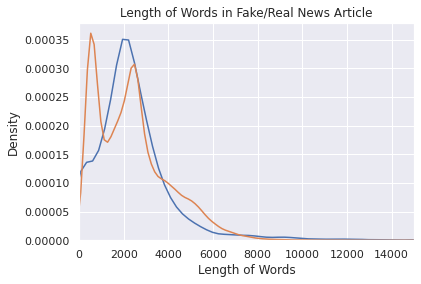

In [ ]:
df['LengthofWords']=[len(word) for word in (df['text'])]

import matplotlib.pyplot as plt

frequency_fake = df[df['Label']==1]
frequency_real = df[df['Label']==0]
sns.distplot(frequency_fake['LengthofWords'], rug=False, hist=False)
sns.distplot(frequency_real['LengthofWords'], rug=False, hist=False)
plt.xlim(0, 15000)
plt.xlabel('Length of Words')

plt.title('Length of Words in Fake/Real News Article')

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df

,title,text,subject,date,Label,LengthofWords,year
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,2017-12-31,1,2702,2017.0
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,1,1894,2017.0
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,News,2017-12-30,1,3386,2017.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,News,2017-12-29,1,2609,2017.0
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,2017-12-25,1,2346,2017.0
...,...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,brussels reuters nato allies on tuesday we...,worldnews,2017-08-22,0,2798,2017.0
21413,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis a provider of l...,worldnews,2017-08-22,0,796,2017.0
21414,Minsk cultural hub becomes haven from authorities,minsk reuters in the shadow of disused sov...,worldnews,2017-08-22,0,1936,2017.0
21415,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary of state ...,worldnews,2017-08-22,0,1193,2017.0


In [ ]:
def words_in_texts(words, texts):
    indicator_array = []
    for i in np.arange(len(words)):
        convert_integer = list(map(int,texts.str.contains(words[i])))  
        indicator_array.append(convert_integer)
        i+=1
    return np.transpose(indicator_array) 



In [ ]:
frequency_texts = pd.Series(['trump', 'reuters','washington'])
frequency=(pd.DataFrame(words_in_texts(frequency_texts, df['text'])))
frequency.columns = ['trump', 'reuters','washington']




df['trump'] = frequency['trump']
df['reuters'] = frequency['reuters']
df['washington'] = frequency['washington']
df

,title,text,subject,date,Label,LengthofWords,year,trump,reuters,washington
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,2017-12-31,1,2702,2017.0,1,0,0
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,1,1894,2017.0,1,0,0
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,News,2017-12-30,1,3386,2017.0,1,0,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,News,2017-12-29,1,2609,2017.0,1,0,1
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,2017-12-25,1,2346,2017.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,brussels reuters nato allies on tuesday we...,worldnews,2017-08-22,0,2798,2017.0,0,0,0
21413,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis a provider of l...,worldnews,2017-08-22,0,796,2017.0,0,0,1
21414,Minsk cultural hub becomes haven from authorities,minsk reuters in the shadow of disused sov...,worldnews,2017-08-22,0,1936,2017.0,0,0,0
21415,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary of state ...,worldnews,2017-08-22,0,1193,2017.0,0,0,1


In [ ]:
df['NumberofWords'] = df["text"].apply(lambda x: len(x.split()))
f=df[df['Label'] == 1]
r=df[df['Label'] == 0]

In [ ]:
len(df[df['Label']==1]), len(df[df['Label']==0])


(23481, 21417)

In [ ]:
df.groupby('Label').sum()

,LengthofWords,year,trump,reuters,washington,NumberofWords
Label,,,,,,
0,50712057,43193373.0,11865,250,2716,8305865
1,59124660,47324330.0,12637,317,3320,10066860


In [ ]:
realAve = 8305865/21417
fakeAve = 10066860/23481

print ("The average number of words in a real news article is ", realAve)
print ("The average number of words in a real news article is ", fakeAve)

The average number of words in a real news article is  387.8164542186114
The average number of words in a real news article is  428.7236489076274


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

Text(0.5, 1.0, 'Number of Words in Fake News Article')

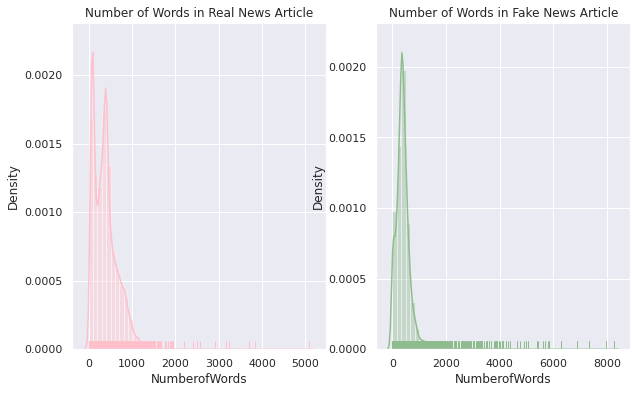

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.distplot(r['NumberofWords'], ax = ax[0], color = "pink", rug = True).set_title("Number of Words in Real News Article")
sns.distplot(f['NumberofWords'], ax = ax[1], color = "DARKSEAGREEN", rug = True).set_title("Number of Words in Fake News Article")



Text(0.5, 1.0, 'Fake/Real News reuters words appeared Proportion')

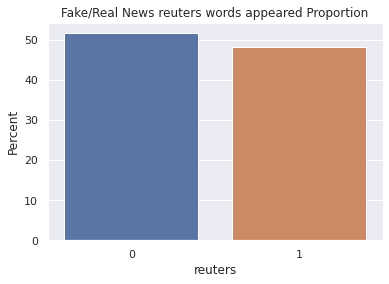

In [ ]:
ax = sns.barplot(x="reuters", y="reuters", data=frequency, estimator=lambda x: len(x) / len(frequency) * 100)
ax.set(ylabel="Percent")


plt.title('Fake/Real News reuters words appeared Proportion')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


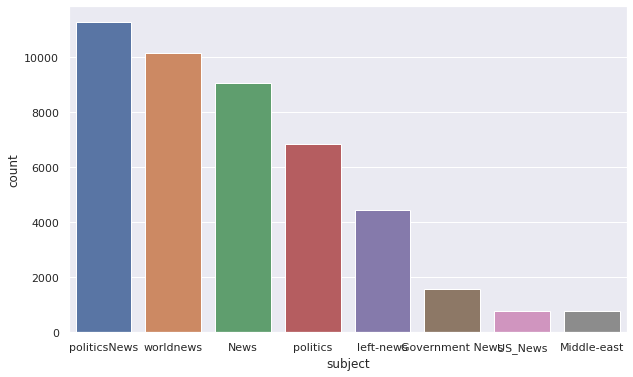

In [ ]:
plt.figure(figsize =(10,6))
sns.countplot(df['subject'], order = df['subject'].value_counts().index)

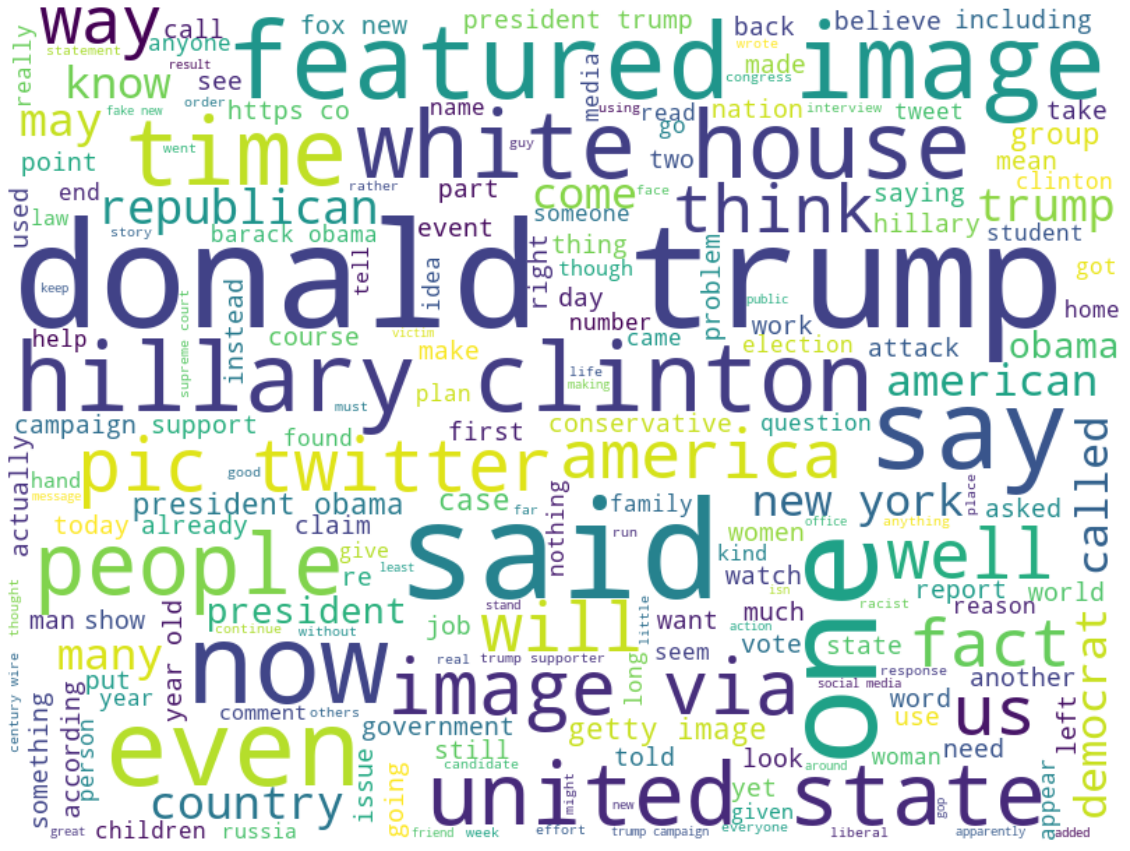

In [ ]:
!pip install wordcloud
from os import path
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
fake=f['text']
wordcloud=WordCloud(width = 800, height = 600,
                    background_color ='white').generate(' '.join(fake))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


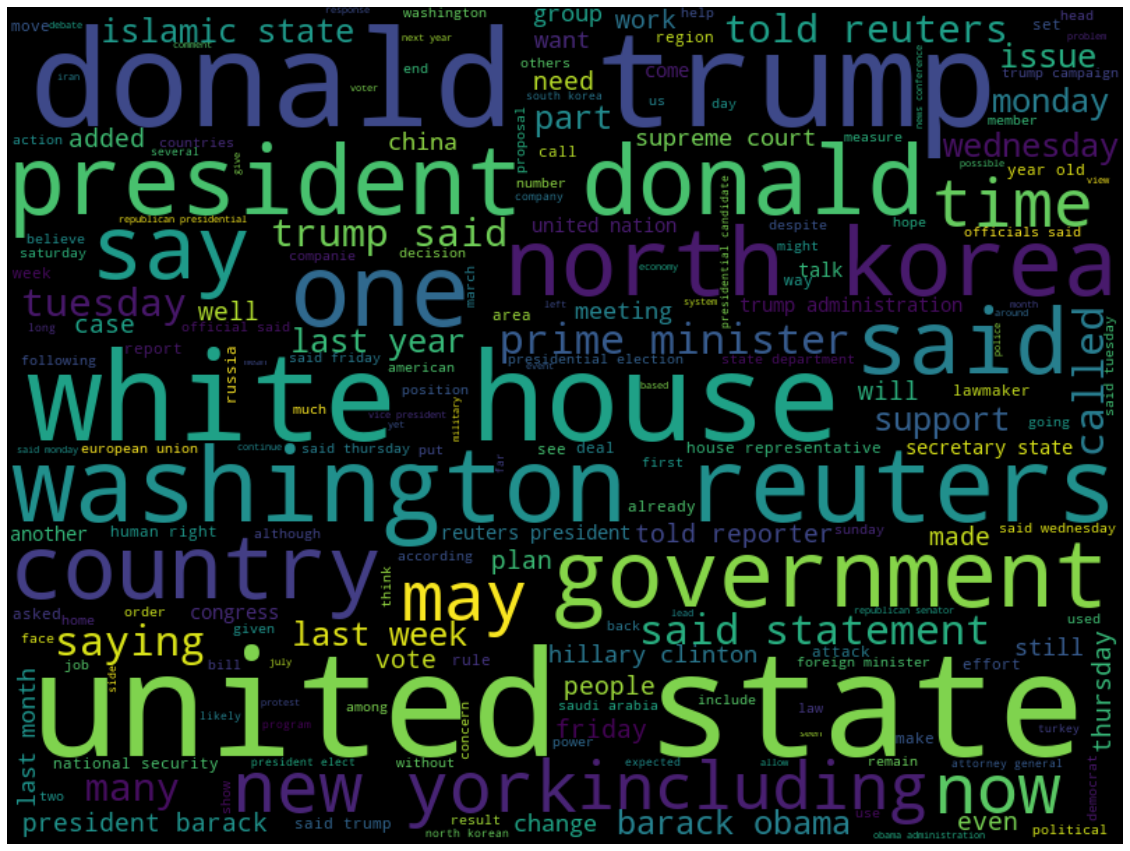

Text(0.5, 1.0, 'Plot of Most Frequent Words in Real News')

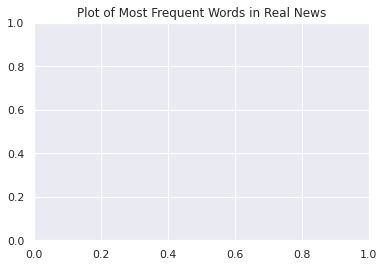

In [ ]:
plt.figure(figsize=(20,20))
real=r['text']
wordcloud=WordCloud(width = 800, height = 600,background_color ='black').generate(' '.join(real))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.title("Plot of Most Frequent Words in Real News")

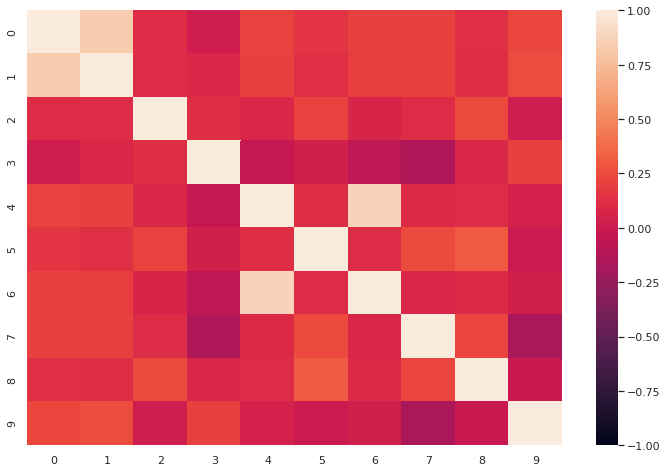

In [ ]:
import seaborn as sns
sns.set()
text_list_fake = pd.Series(['trump','donald','say','said','clinton','now','hillary','feature','one','washington'])
frequency0=(pd.DataFrame(words_in_texts(text_list_fake, df['text'])))
plt.figure(figsize = (12,8))
sns.heatmap(frequency0.corr(),vmin = -1, vmax = 1)

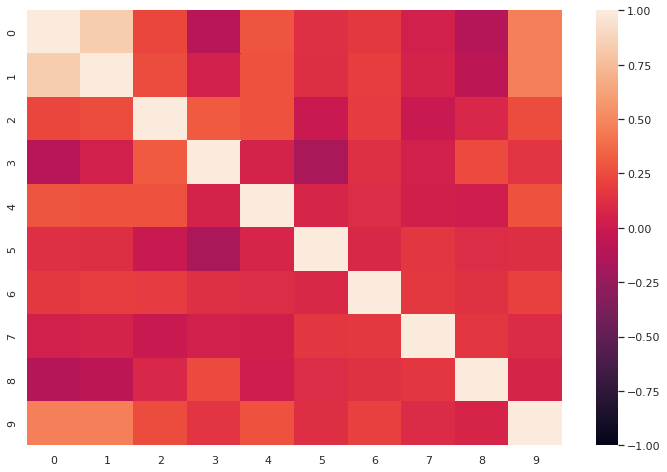

In [ ]:
import seaborn as sns
sns.set()
text_list_real = pd.Series(['trump','donald','washington','reuters','white house','one','united state','country','government','president'])
frequency0=(pd.DataFrame(words_in_texts(text_list_real, df['text'])))
plt.figure(figsize = (12,8))
sns.heatmap(frequency0.corr(),vmin = -1, vmax = 1)

In [ ]:

from keras import Sequential
from keras import optimizers
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential,Model
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from sklearn.model_selection import KFold, cross_val_score, train_test_split



x=df['text']
y=df['Label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
xv_train = vectorizer.fit_transform(x_train)
xv_test = vectorizer.transform(x_test)

In [ ]:
xv_train

<33673x95258 sparse matrix of type '<class 'numpy.float64'>'
	with 6895881 stored elements in Compressed Sparse Row format>

**Logistic Regression Model** 

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xv_train,y_train)
LR.score(xv_test,y_test)

0.9853006681514477

In [ ]:
LR.score(xv_train,y_train)

0.9914768508894366

In [ ]:
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import mean_squared_error

y_pred_lr = LR.predict(xv_test)
print ("Accuracy is: ", metrics.accuracy_score(y_test, y_pred_lr))
print("Mean Squared Error is:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Accuracy is:  0.9853006681514477
Mean Squared Error is: 0.12124080108838088


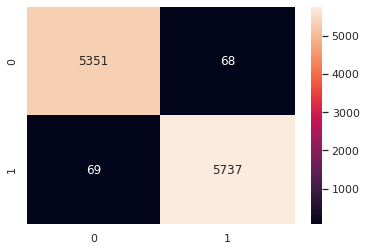

In [ ]:
lr_cm = metrics.confusion_matrix(y_test, y_pred_lr)
labels = [['5351', '68'],['69','5737']]
sns.heatmap(lr_cm, annot=labels, fmt = '')
plt.show()

In [ ]:
print(y_train.shape)
print(xv_train.shape)
xv_train
print(xv_train)

(33673,)
(33673, 95258)
  (0, 12460)	0.038434127377668235
  (0, 74639)	0.03799631069551595
  (0, 90303)	0.02773679705490124
  (0, 90210)	0.02095056327926715
  (0, 39083)	0.023057656059077673
  (0, 28658)	0.02415680394629263
  (0, 55425)	0.043659058139921984
  (0, 35932)	0.06325903582266648
  (0, 14604)	0.04080943866061924
  (0, 3964)	0.050332078263700425
  (0, 92308)	0.020263156496283928
  (0, 16291)	0.03257866855649574
  (0, 22462)	0.03704481449059131
  (0, 91516)	0.027849830934248906
  (0, 50161)	0.035532857066444434
  (0, 83978)	0.04276165869702579
  (0, 94398)	0.03685699828087909
  (0, 7587)	0.02070664314214391
  (0, 80610)	0.029972330663031198
  (0, 57280)	0.02683929475142437
  (0, 64155)	0.04086530495416839
  (0, 86041)	0.08637190734440361
  (0, 11531)	0.029268923240281384
  (0, 75767)	0.059661341849530605
  (0, 30186)	0.042326891963941196
  :	:
  (33672, 54897)	0.018587625264172004
  (33672, 75040)	0.033862039777984555
  (33672, 11579)	0.047681215947056835
  (33672, 386)	0.03489

In [ ]:
xt = xv_train[1:1000].toarray()
xte = xv_test[1:1000].toarray()

In [ ]:
#from sklearn.qda import QDA
#import sklearn.discriminant_analysis
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.decomposition import PCA

clf = QDA()
pca = PCA(n_components=2)
pca.fit(xt)
pca.fit(xte)
clf.fit(xt,y_train[1:1000])
clf.score(xte,y_test[1:1000])

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
import numpy as np
# Referencing https://github.com/zziz/cart/blob/master/cart.py

class CART(object):
    def __init__(self, tree = 'cls', criterion = 'gini', prune = 'depth', max_depth = 4, min_criterion = 0.05):
        self.feature = None
        self.label = None
        self.n_samples = None
        self.gain = None
        self.left = None
        self.right = None
        self.threshold = None
        self.depth = 0

        self.root = None
        self.criterion = criterion
        self.prune = prune
        self.max_depth = max_depth
        self.min_criterion = min_criterion
        self.tree = tree

    def fit(self, features, target):
        self.root = CART()
        if(self.tree == 'cls'):
            self.root._grow_tree(features, target, self.criterion)
        else:
            self.root._grow_tree(features, target, 'mse')
        self.root._prune(self.prune, self.max_depth, self.min_criterion, self.root.n_samples)

    def predict(self, features):
        return np.array([self.root._predict(f) for f in features])

    def print_tree(self):
        self.root._show_tree(0, ' ')

    def _grow_tree(self, features, target, criterion = 'gini'):
        self.n_samples = features.shape[0] 

        if len(np.unique(target)) == 1:
            self.label = target[0]
            return

        best_gain = 0.0
        best_feature = None
        best_threshold = None

        if criterion in {'gini', 'entropy'}:
            self.label = max([(c, len(target[target == c])) for c in np.unique(target)], key = lambda x : x[1])[0]
        else:
            self.label = np.mean(target)

        impurity_node = self._calc_impurity(criterion, target)
        
        for col in range(features.shape[1]):
            feature_level = np.unique(features[:,col])
            thresholds = (feature_level[:-1] + feature_level[1:]) / 2.0

            for threshold in thresholds:
                target_l = target[features[:,col] <= threshold]
                impurity_l = self._calc_impurity(criterion, target_l)
                n_l = float(target_l.shape[0]) / self.n_samples

                target_r = target[features[:,col] > threshold]
                impurity_r = self._calc_impurity(criterion, target_r)
                n_r = float(target_r.shape[0]) / self.n_samples

                impurity_gain = impurity_node - (n_l * impurity_l + n_r * impurity_r)
                if impurity_gain > best_gain:
                    best_gain = impurity_gain
                    best_feature = col
                    best_threshold = threshold

        self.feature = best_feature
        self.gain = best_gain
        self.threshold = best_threshold
        self._split_tree(features, target, criterion)

    def _split_tree(self, features, target, criterion):
        features_l = features[features[:, self.feature] <= self.threshold]
        target_l = target[features[:, self.feature] <= self.threshold]
        self.left = CART()
        self.left.depth = self.depth + 1
        self.left._grow_tree(features_l, target_l, criterion)

        features_r = features[features[:, self.feature] > self.threshold]
        target_r = target[features[:, self.feature] > self.threshold]
        self.right = CART()
        self.right.depth = self.depth + 1
        self.right._grow_tree(features_r, target_r, criterion)

    def _calc_impurity(self, criterion, target):
        if criterion == 'gini':
            return 1.0 - sum([(float(len(target[target == c])) / float(target.shape[0])) ** 2.0 for c in np.unique(target)])
        elif criterion == 'mse':
            return np.mean((target - np.mean(target)) ** 2.0)
        else:
            entropy = 0.0
            for c in np.unique(target):
                p = float(len(target[target == c])) / target.shape[0]
                if p > 0.0:
                    entropy -= p * np.log2(p)
            return entropy            

    def _prune(self, method, max_depth, min_criterion, n_samples):
        if self.feature is None:
            return

        self.left._prune(method, max_depth, min_criterion, n_samples)
        self.right._prune(method, max_depth, min_criterion, n_samples)

        pruning = False

        if method == 'impurity' and self.left.feature is None and self.right.feature is None: 
            if (self.gain * float(self.n_samples) / n_samples) < min_criterion:
                pruning = True
        elif method == 'depth' and self.depth >= max_depth:
            pruning = True

        if pruning is True:
            self.left = None
            self.right = None
            self.feature = None

    def _predict(self, d):
        if self.feature != None:
            if d[self.feature] <= self.threshold:
                return self.left._predict(d)
            else:
                return self.right._predict(d)
        else: 
            return self.label

    def _show_tree(self, depth, cond):
        base = '    ' * depth + cond
        if self.feature != None:
            print(base + 'if X[' + str(self.feature) + '] <= ' + str(self.threshold))
            self.left._show_tree(depth+1, 'then ')
            self.right._show_tree(depth+1, 'else ')
        else:
            print(base + '{value: ' + str(self.label) + ', samples: ' + str(self.n_samples) + '}')


In [ ]:
from sklearn import tree
cls = tree.DecisionTreeClassifier()
cls.fit(x_train,y_train)
cls.predict(x_test,y_test)

ValueError: ignored

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                 hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)